In [13]:
import matplotlib.pyplot as plt 
import pandas as pd
Cumulative_df = pd.read_csv("cumulative.csv")


In [3]:

Cumulative_df= Cumulative_df.drop(columns=['rowid','kepid','kepoi_name','kepler_name','koi_tce_delivname','koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec'])
Cumulative_df = Cumulative_df.dropna(axis='columns', how='all')
Cumulative_df = Cumulative_df.dropna()

In [4]:

y = Cumulative_df['koi_disposition']
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [5]:
X= Cumulative_df.drop(columns=['koi_disposition','koi_pdisposition'])
X

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,0.021,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, encoded_y)
rf.score(X, encoded_y)

1.0

In [8]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.33308082, 0.01791532, 0.01282881, 0.01228565, 0.01262237,
       0.01956543, 0.01980107, 0.02289909, 0.01028441, 0.01024125,
       0.02558844, 0.02743699, 0.02748702, 0.02033745, 0.01156702,
       0.01204338, 0.0539679 , 0.03323973, 0.0385653 , 0.01705618,
       0.01626159, 0.01828561, 0.01622002, 0.05039553, 0.00361644,
       0.00915281, 0.03604694, 0.02523507, 0.00913926, 0.00861279,
       0.00969676, 0.00874651, 0.00947103, 0.00778949, 0.01238598,
       0.01049818, 0.00963238])

In [9]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.333080815278191, 'koi_score'),
 (0.05396790243945311, 'koi_prad'),
 (0.050395525608826985, 'koi_model_snr'),
 (0.03856529865006568, 'koi_prad_err2'),
 (0.036046935060315095, 'koi_steff_err1'),
 (0.03323972999611169, 'koi_prad_err1'),
 (0.027487020722918285, 'koi_duration_err2'),
 (0.02743699211036746, 'koi_duration_err1'),
 (0.02558844009761511, 'koi_duration'),
 (0.025235068368876644, 'koi_steff_err2'),
 (0.022899089750183732, 'koi_impact'),
 (0.020337449152348867, 'koi_depth'),
 (0.019801072745793437, 'koi_time0bk_err2'),
 (0.019565434610641547, 'koi_time0bk_err1'),
 (0.018285612398938226, 'koi_insol_err1'),
 (0.01791532288511777, 'koi_period'),
 (0.01705618194675033, 'koi_teq'),
 (0.016261585081514773, 'koi_insol'),
 (0.016220022415382968, 'koi_insol_err2'),
 (0.012828809880632916, 'koi_period_err1'),
 (0.012622365575160319, 'koi_time0bk'),
 (0.012385980233105132, 'ra'),
 (0.012285650427699689, 'koi_period_err2'),
 (0.012043378549911488, 'koi_depth_err2'),
 (0.01156701527948809,

In [10]:

X_data = X['koi_score']

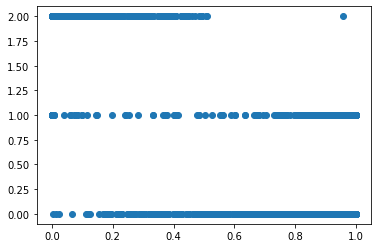

In [14]:
plt.scatter(X_data,encoded_y)